In [51]:
#initial imports
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Data Preparation

Read crypto_data.csv into Pandas

In [52]:
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


Discard all cryptocurrencies that are not being traded.

In other words, filter for currencies that are currently being traded.

In [53]:
crypto_df = crypto_df.loc[crypto_df["IsTrading"] != False]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


Once you have done this, drop the IsTrading column from the dataframe

In [54]:
# Remove the IsTrading Column
crypto_df = crypto_df.drop(columns=["IsTrading"])
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


Remove all rows that have at least one null value

In [55]:
# Remove all rows with `null` values if any.
# Find null values
for column in crypto_df.columns:
    print(f"Column '{column}' has {crypto_df[column].isnull().sum()} null values.")

Column 'Unnamed: 0' has 0 null values.
Column 'CoinName' has 0 null values.
Column 'Algorithm' has 0 null values.
Column 'ProofType' has 0 null values.
Column 'TotalCoinsMined' has 459 null values.
Column 'TotalCoinSupply' has 0 null values.


In [56]:
crypto_df = crypto_df.dropna(axis=0, how='any')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [57]:
# Run again just as a check
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values.")

Column Unnamed: 0 has 0 null values.
Column CoinName has 0 null values.
Column Algorithm has 0 null values.
Column ProofType has 0 null values.
Column TotalCoinsMined has 0 null values.
Column TotalCoinSupply has 0 null values.


In [58]:
# Remove duplicate entries if any.
# Find duplicate entries
print(f"Duplicate entries: {crypto_df.duplicated().sum()}")

Duplicate entries: 0


Filter for cryptocurrencies that have been mined. 

That is, the total coins mined should be greater than zero.

In [59]:
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] != 0]
print(crypto_df)

     Unnamed: 0     CoinName    Algorithm ProofType  TotalCoinsMined  \
0            42      42 Coin       Scrypt   PoW/PoS     4.199995e+01   
2           404      404Coin       Scrypt   PoW/PoS     1.055185e+09   
5          1337    EliteCoin          X13   PoW/PoS     2.927942e+10   
7           BTC      Bitcoin      SHA-256       PoW     1.792718e+07   
8           ETH     Ethereum       Ethash       PoW     1.076842e+08   
...         ...          ...          ...       ...              ...   
1238       ZEPH       ZEPHYR      SHA-256      DPoS     2.000000e+09   
1242        GAP      Gapcoin       Scrypt   PoW/PoS     1.493105e+07   
1245        BDX       Beldex  CryptoNight       PoW     9.802226e+08   
1246        ZEN      Horizen     Equihash       PoW     7.296538e+06   
1247        XBC  BitcoinPlus       Scrypt       PoS     1.283270e+05   

     TotalCoinSupply  
0                 42  
2          532000000  
5       314159265359  
7           21000000  
8                  0

In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. 

Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.

In [60]:
crypto_df = crypto_df.drop(columns=["CoinName"])
crypto_df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [61]:
# Well nothing was said about the unnamed column, its got non-numeric info in it, but hasn't been told to  be dropped. 
#So its going to be the index name now that it is cleaned

crypto_df = crypto_df.set_index('Unnamed: 0')
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [62]:
clean_crypto_df = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
clean_crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data.

To accomplish this task, use Pandas to create dummy variables. 

Examine the number of rows and columns of your dataset now. How did they change?

In [63]:
# Save the cleaned DataFrame as a `CSV` file, name it as `cleaned_crypto_data.csv`.
# Saving cleaned data
file_path = Path("cleaned_crypto_data.csv.csv")
clean_crypto_df.to_csv(file_path)

*Examine the number of rows and columns of your dataset now. How did they change?* 

**Well the number of columns grew to 100, and every column is numeric as intended. The number of rows didn't change, but they wouldn't as we are done preprocessing.**

Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

In [64]:
# Standarize data with StandarScaler
X_scaled = StandardScaler().fit_transform(clean_crypto_df)
print(X_scaled[0:5])

[[-0.11674788 -0.15286468 -0.0433555  -0.0433555  -0.0433555  -0.06137164
  -0.07523548 -0.0433555  -0.06137164 -0.06137164 -0.0433555  -0.0433555
  -0.19226279 -0.06137164 -0.09731237 -0.0433555  -0.11536024 -0.07523548
  -0.0433555  -0.0433555  -0.15176505 -0.0433555  -0.13105561 -0.0433555
  -0.0433555  -0.08695652 -0.0433555  -0.0433555  -0.0433555  -0.0433555
  -0.06137164 -0.0433555  -0.08695652 -0.08695652 -0.08695652 -0.0433555
  -0.13105561 -0.13827675 -0.13827675 -0.0433555  -0.06137164 -0.0433555
  -0.07523548 -0.1815096  -0.0433555  -0.0433555  -0.0433555  -0.07523548
  -0.15811388 -0.3145935  -0.0433555  -0.08695652 -0.07523548 -0.06137164
  -0.0433555   1.38873015 -0.0433555  -0.0433555  -0.06137164 -0.0433555
  -0.0433555  -0.0433555  -0.0433555  -0.0433555  -0.0433555  -0.0433555
  -0.0433555  -0.39836623 -0.0433555  -0.1815096  -0.0433555  -0.08695652
  -0.08695652 -0.10670145 -0.0433555  -0.0433555  -0.13105561 -0.0433555
  -0.0433555  -0.0433555  -0.0433555  -0.07523

## Dimensionality Reduction

Creating dummy variables above dramatically increased the number of features in your dataset. 

Perform dimensionality reduction with PCA.

In [115]:
# Applying PCA to reduce dimensions from 100 to 5 as a test

# Initialize PCA model
pca = PCA(n_components=5)

# Get the five principal components for the crypto data.
coin_pca = pca.fit_transform(X_scaled)
coin_pca

array([[-3.25124531e-01,  1.04318135e+00, -5.91322326e-01,
        -6.98773929e-03, -1.53375496e-02],
       [-3.08437116e-01,  1.04337046e+00, -5.91567296e-01,
        -6.98920147e-03, -1.54306551e-02],
       [ 2.30242543e+00,  1.60748922e+00, -7.13999012e-01,
         2.61447543e-03,  4.16640566e-02],
       ...,
       [ 3.22943005e-01, -2.31767421e+00,  4.29049969e-01,
         1.30617028e-02,  2.91390161e-03],
       [-1.65764917e-01, -2.14753206e+00,  3.92182101e-01,
         8.47038026e-04, -6.12532698e-02],
       [-2.76942854e-01,  8.53284503e-01, -2.39761306e-01,
        -2.73784757e-03, -2.07730837e-02]])

In [116]:
# Transform PCA data to a DataFrame
df_coin_pca_test = pd.DataFrame(data=coin_pca, 
                           columns=["principal component 1",
                                    "principal component 2",
                                    "principal component 3",
                                    "principal component 4",
                                    "principal component 5"]
)

# Reset index
df_coin_pca_test.reset_index(inplace=True, drop=True)

# Display index
df_coin_pca_test

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.325125,1.043181,-0.591322,-0.006988,-0.015338
1,-0.308437,1.043370,-0.591567,-0.006989,-0.015431
2,2.302425,1.607489,-0.713999,0.002614,0.041664
3,-0.155831,-1.317174,0.189114,-0.006588,0.001909
4,-0.154521,-2.020003,0.370394,0.019774,-0.001088
...,...,...,...,...,...
528,2.456277,0.802484,-0.076346,-0.010480,-0.088336
529,-0.323167,1.043070,-0.591324,-0.006987,-0.015329
530,0.322943,-2.317674,0.429050,0.013062,0.002914
531,-0.165765,-2.147532,0.392182,0.000847,-0.061253


In [117]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02737218, 0.02097229, 0.02009723, 0.02003632, 0.0200332 ])

### **Initial Sample Analysis**

**According to the explained variance, the first principal component contains approximately `3%` of the variance and the second principal component contains `2%` of the variance, and the third principal component contains `2%`, and the fourth is `2%` as well as the fifth `2%`. We have approximately `11%` of the information in the original dataset, so not good, not good at all. We will set the pca(n_components=0.9) and then determine the number of features were required.**

Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance. 

For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3.

In [118]:
# New initialization params
pca = PCA(n_components=0.99)

# Get 99% explained variance for the crypto data.
coin_pca_99 = pca.fit_transform(X_scaled)

In [69]:
# Transform PCA data to a DataFrame
df_coin_pca_99 = pd.DataFrame(data=coin_pca_99,
                              columns=["pc1",
                                      "pc2",
                                      "pc3",
                                      "pc4",
                                      "pc5",
                                      "pc6",
                                      "pc7"]
)
df_coin_pca_99.head()

ValueError: Shape of passed values is (533, 87), indices imply (533, 5)

**Okay well we know from the output error that we need 87 items to get 99%*
*But you can't have 87 'Principal Components' at that point they're just components, so error is left intentionally**

In [70]:
# Fetch the explained variance
a = pca.explained_variance_ratio_
round(sum(a), 87)

0.991683755180077

In [71]:
# Final initialization params we need to get to 90%
pca = PCA(n_components=0.90)

# Get 90% explained variance for the crypto data.
coin_pca_90 = pca.fit_transform(X_scaled)

In [72]:
# Fetch the explained variance
b = pca.explained_variance_ratio_
round(sum(b), 5)

0.90307

*For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?*

**So with 100 features one would think that keeping 99% wouldn't require 99 of the 100 variables, they are weighed differently, albeit each one seems to be pretty low, so requiring 87 variables to explain 99% of the data makes sense. It also made sense that accounting for 90% of the data would require a low number, we have been working with low-order numbers for the principal component so needing 4 or 5 when we typically use 2 or 3 wasn't too much of a change that would make it suspect outright.**

## Next, further reduce the dataset dimensions with t-SNE and visually inspect the results.

In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. 


In [73]:
file_path = Path("cleaned_crypto_data.csv.csv")
new_df = pd.read_csv(file_path)

In [74]:
new_df = new_df.drop(columns=['Unnamed: 0'])
new_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_df)

In [87]:
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_features)

In [88]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=95)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [89]:
# Check that dimensions have been reduced to two
tsne_features.shape

(533, 2)

In [93]:
# Prepare to plot the dataset
new_df['x'] = transformed_features[:,0]
new_df['y'] = transformed_features[:,1]

Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

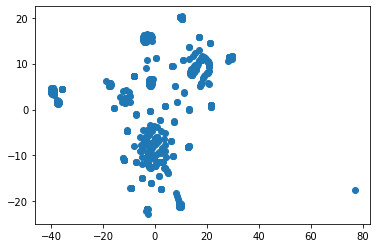

In [102]:
# Visualize the clusters
plt.scatter(new_df['x'], new_df['y'])
plt.show()

In [103]:
labels.value_counts()

NameError: name 'labels' is not defined

## Cluster Analysis with k-Means

Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10.

In [95]:
# call empty inertia to hold values
inertia = []
k = list(range(1,11))

# Calculate the inertia for the best range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(coin_pca_90)
    inertia.append(km.inertia_)

C:\Users\mdebo\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

In [96]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, 
              "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)


# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

In [97]:
# View the elbow curve df data
df_elbow.head(10)

,k,inertia
0,1,48133.729640
1,2,47062.509481
2,3,45993.719815
3,4,45141.269181
4,5,44532.766786
5,6,43057.969002
6,7,42630.569035
7,8,41004.407455
8,9,40964.700453
9,10,40358.623729


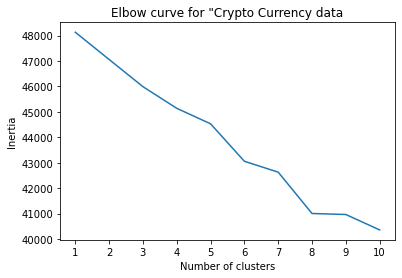

In [106]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for "Crypto Currency data')
plt.show()

In [107]:
# Create a function called get_clusters(k, data) that finds the k clusters using K-Means on data. The function should return a DataFrame copy of Data that should include a new column containing the clusters found.

In [108]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

**Analyzing Clusters with the Best Value of `k`**

In [111]:
# Initializing model with K = 4
model = KMeans(n_clusters = 4, random_state = 5)

In [112]:
# Train the model
model.fit(coin_pca_90)

# Predict clusters
predictions = model.predict(coin_pca_90)

# Create return DataFrame with predicted clusters
coin_pca_90["class"] = model.labels_
coin_pca_90

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [121]:
clusters = get_clusters(4, coin_pca_90)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [122]:
clusters

NameError: name 'clusters' is not defined

In [119]:
def show_clusters(coin_pca_90):
    plt.scatter(coin_pca_90['principal component 1'], coin_pca_90['principal component 2'])
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt,title('Crypto Currencies')
    plt.show()

In [ ]:
#df_t_SNE = pd.read_csv(file_path)

In [ ]:
#df_t_SNE.sample(10)

In [ ]:
# Fitting model
model.fit(df)

In [ ]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=125)

In [ ]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_t_SNE)

## Recommendation

Based on your findings, make a brief (1-2 sentences) recommendation to your clients. 

Can the cryptocurrencies be clustered together? 

If so, into how many clusters?

**There are two clusters, this was determined by performing deamensonality reductions on the cryptocurrency datasets, and then that number was narrowed down to 2 clusters by perfroming t-SNE, which is to say that the t-distributed stochastic neighbor embedding was perfromed on the number of variables that had been slimmed down first by the Principal Component Analysis to a 90% confidence interval, or accuracy, for the lack of a better term.**